In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, LSTM, Dense,Conv1D, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam


In [7]:
excel_data = pd.read_excel('./Dataset/Grade-I/GRADE-I(2015-2022).xlsx')
df = pd.DataFrame(excel_data)
df.head()

,Market,Date,Variety,Grade,Arrivals,Unit,Min,Max,Modal,District
0,MANGALURU,2020-01-01,GRADE-I,AVERAGE,1000,Numbers,16000,30000,24000,Dakshina Kannada
1,MANGALURU,2020-01-02,GRADE-I,AVERAGE,750,Numbers,16000,28000,25000,Dakshina Kannada
2,MANGALURU,2020-01-04,GRADE-I,AVERAGE,500,Numbers,16000,28000,22000,Dakshina Kannada
3,MANGALURU,2020-01-13,GRADE-I,AVERAGE,1200,Numbers,16000,28000,25000,Dakshina Kannada
4,MANGALURU,2020-01-14,GRADE-I,AVERAGE,1200,Numbers,16000,28000,25000,Dakshina Kannada


In [8]:
df.isna().sum()

Market      0
Date        0
Variety     0
Grade       0
Arrivals    0
Unit        0
Min         0
Max         0
Modal       0
District    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1467 entries, 0 to 1466
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Market    1467 non-null   object
 1   Date      1467 non-null   object
 2   Variety   1467 non-null   object
 3   Grade     1467 non-null   object
 4   Arrivals  1467 non-null   int64 
 5   Unit      1467 non-null   object
 6   Min       1467 non-null   int64 
 7   Max       1467 non-null   int64 
 8   Modal     1467 non-null   int64 
 9   District  1467 non-null   object
dtypes: int64(4), object(6)
memory usage: 114.7+ KB


In [10]:
df_test = df
df_test['Date']=pd.to_datetime(df['Date'])

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1467 entries, 0 to 1466
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Market    1467 non-null   object        
 1   Date      1467 non-null   datetime64[ns]
 2   Variety   1467 non-null   object        
 3   Grade     1467 non-null   object        
 4   Arrivals  1467 non-null   int64         
 5   Unit      1467 non-null   object        
 6   Min       1467 non-null   int64         
 7   Max       1467 non-null   int64         
 8   Modal     1467 non-null   int64         
 9   District  1467 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 114.7+ KB


In [12]:
df_test.sort_values(by='Date',inplace=True)

In [13]:
df_test = df[['Date','Min','Max','Modal']]
df_test

,Date,Min,Max,Modal
99,2015-01-01,12500,22500,18500
100,2015-01-02,12500,22500,18500
101,2015-01-03,12500,22500,18500
102,2015-01-05,12000,23500,19000
103,2015-01-06,12000,23500,19000
...,...,...,...,...
94,2021-06-01,27000,33000,29000
95,2021-07-01,27000,33000,29000
96,2021-11-23,2000,2700,2500
97,2022-08-18,14000,18000,16000


In [14]:
#df_test.to_csv('./Dataset/Grade-I/grade-I_test.csv',index=False)

In [15]:
excel_data1 = pd.read_excel('./Dataset/Grade-I/grade-I_test.xlsx')
df_1 = pd.DataFrame(excel_data1)

In [16]:
df_test = df_1

In [17]:
df_test.index = df_test['Date']
df_test

,Date,Min,Max,Modal
Date,,,,
2015-01-01,2015-01-01,12500,22500,18500
2015-01-02,2015-01-02,12500,22500,18500
2015-01-03,2015-01-03,12500,22500,18500
2015-01-05,2015-01-05,12000,23500,19000
2015-01-06,2015-01-06,12000,23500,19000
...,...,...,...,...
2020-12-24,2020-12-24,27000,33000,29000
2020-12-28,2020-12-28,27000,33000,29000
2020-12-29,2020-12-29,27000,33000,29000


In [18]:
df_test = df_test.drop('Date',axis=1)


In [19]:
df_test

,Min,Max,Modal
Date,,,
2015-01-01,12500,22500,18500
2015-01-02,12500,22500,18500
2015-01-03,12500,22500,18500
2015-01-05,12000,23500,19000
2015-01-06,12000,23500,19000
...,...,...,...
2020-12-24,27000,33000,29000
2020-12-28,27000,33000,29000
2020-12-29,27000,33000,29000


In [20]:
df_test.to_csv('./Dataset/Grade-I/grade-I_test.csv',index=False)

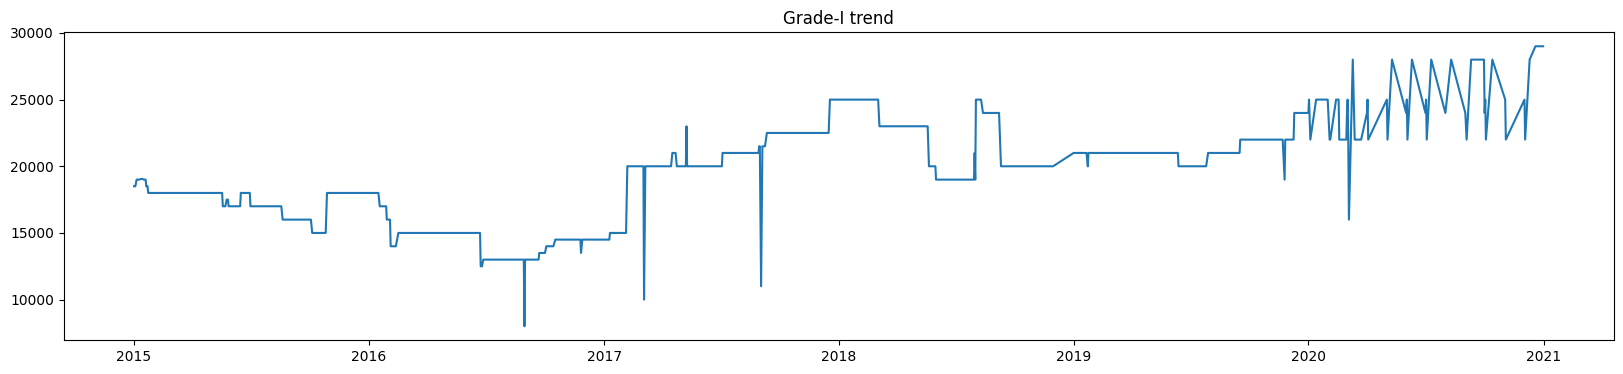

In [21]:
plt.figure(figsize=(20,4))
plt.plot(df_test['Modal'])
plt.title('Grade-I trend')
plt.show()

In [22]:
from sklearn.preprocessing import MinMaxScaler 

scaler_gradeI = MinMaxScaler(feature_range=(0,1))

In [23]:
df_gradeI = df_test

In [24]:
# Define the columns you want to scale
columns_to_scale = ['Min', 'Max', 'Modal']

# Apply MinMaxScaler to the selected columns
df_gradeI[columns_to_scale] = scaler_gradeI.fit_transform(df_gradeI[columns_to_scale])

In [25]:
import joblib

joblib.dump(scaler_gradeI, './Scaler Objects/scaler_grade-I.pkl')

['./Scaler Objects/scaler_grade-I.pkl']

In [26]:
df_test

,Min,Max,Modal
Date,,,
2015-01-01,0.431373,0.543478,0.50000
2015-01-02,0.431373,0.543478,0.50000
2015-01-03,0.431373,0.543478,0.50000
2015-01-05,0.411765,0.586957,0.52381
2015-01-06,0.411765,0.586957,0.52381
...,...,...,...
2020-12-24,1.000000,1.000000,1.00000
2020-12-28,1.000000,1.000000,1.00000
2020-12-29,1.000000,1.000000,1.00000


In [27]:
def df_to_X_y(df, window_size=1):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0], df_as_np[i+window_size][1], df_as_np[i+window_size][2]   
        y.append(label)
    return np.array(X), np.array(y)

In [28]:
WINDOW_SIZE = 3 
X_gradeI, y_gradeI= df_to_X_y(df_gradeI,WINDOW_SIZE)
X_gradeI.shape, y_gradeI.shape

((1453, 3, 3), (1453, 3))

In [29]:
X_train_gradeI, y_train_gradeI = X_gradeI[:1300], y_gradeI[:1300]
X_val_gradeI, y_val_gradeI = X_gradeI[1300:1400], y_gradeI[1300:1400]
X_test_gradeI, y_test_gradeI = X_gradeI[1400:] ,y_gradeI[1400:] 

X_train_gradeI.shape, y_train_gradeI.shape, X_val_gradeI.shape, y_val_gradeI.shape, X_test_gradeI.shape, y_test_gradeI.shape

((1300, 3, 3), (1300, 3), (100, 3, 3), (100, 3), (53, 3, 3), (53, 3))

In [25]:
model_gradeI = Sequential()
model_gradeI.add(InputLayer((3,3))),
model_gradeI.add(LSTM(64)),
model_gradeI.add(Dense(64, 'relu')),
model_gradeI.add(Dense(30, 'relu')),
model_gradeI.add(Dense(3)),

model_gradeI.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                17408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 30)                1950      
                                                                 
 dense_2 (Dense)             (None, 3)                 93        
                                                                 
Total params: 23611 (92.23 KB)
Trainable params: 23611 (92.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model_gradeI.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[MeanAbsoluteError()])

In [27]:
hist_gradeI = model_gradeI.fit(X_train_gradeI, y_train_gradeI, validation_data=(X_val_gradeI, y_val_gradeI), epochs=100, verbose=2)

Epoch 1/100


41/41 - 5s - loss: 0.2920 - mean_absolute_error: 0.5181 - val_loss: 0.4155 - val_mean_absolute_error: 0.6413 - 5s/epoch - 116ms/step
Epoch 2/100
41/41 - 0s - loss: 0.2307 - mean_absolute_error: 0.4573 - val_loss: 0.3119 - val_mean_absolute_error: 0.5533 - 406ms/epoch - 10ms/step
Epoch 3/100
41/41 - 0s - loss: 0.1588 - mean_absolute_error: 0.3726 - val_loss: 0.1974 - val_mean_absolute_error: 0.4341 - 357ms/epoch - 9ms/step
Epoch 4/100
41/41 - 0s - loss: 0.0836 - mean_absolute_error: 0.2559 - val_loss: 0.0816 - val_mean_absolute_error: 0.2650 - 312ms/epoch - 8ms/step
Epoch 5/100
41/41 - 0s - loss: 0.0267 - mean_absolute_error: 0.1277 - val_loss: 0.0172 - val_mean_absolute_error: 0.1055 - 444ms/epoch - 11ms/step
Epoch 6/100
41/41 - 0s - loss: 0.0081 - mean_absolute_error: 0.0697 - val_loss: 0.0052 - val_mean_absolute_error: 0.0596 - 397ms/epoch - 10ms/step
Epoch 7/100
41/41 - 0s - loss: 0.0066 - mean_absolute_error: 0.0642 - val_loss: 0.0049 - val_mean_absolute_error: 0.0590 - 422ms/epoch

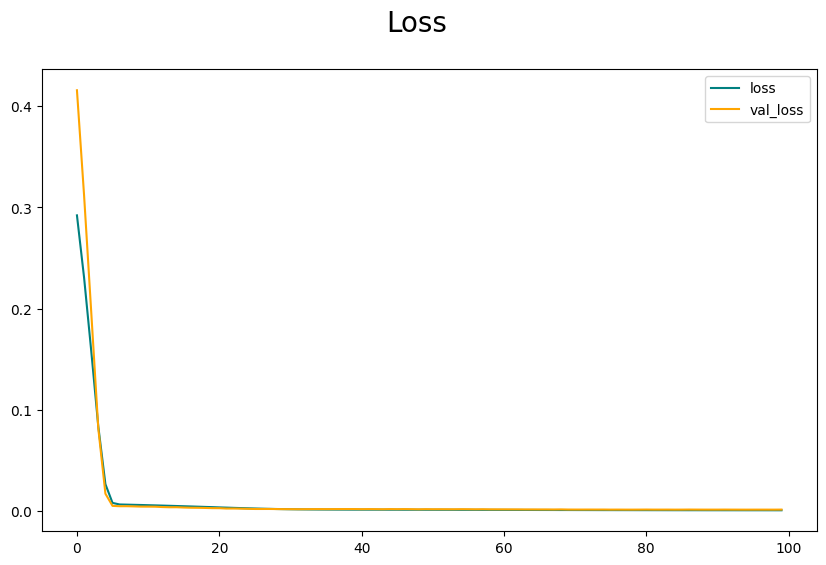

In [28]:
plt.figure(figsize=(10,6))
plt.plot(hist_gradeI.history['loss'],color = 'teal',label = 'loss')
plt.plot(hist_gradeI.history['val_loss'],color='orange',label='val_loss')
plt.suptitle('Loss', fontsize=20)
plt.legend(loc='upper right')
plt.show()

In [29]:
def plot_predictions1D(model, X, y, start=0, end=100, tag='Title'):
    predictions = model.predict(X,verbose=0)
    df = pd.DataFrame({'Predictions':predictions.reshape(-1),'Actual':y})
    mae = mean_absolute_error(y,predictions)
    r2 = r2_score(y,predictions)
    print(f'Mean absolute error for {tag} is {mae}') 
    print('-------------------------------------------------------------------------------------')
    print(f'r2 for {tag} is {r2*100}')
    print('-------------------------------------------------------------------------------------')
    print(df.head(10))
  
    plt.figure(figsize=(20,6))
    plt.plot(df['Predictions'][start:end],label='Predictions_modal')
    plt.plot(df['Actual'][start:end],label='Actual_modal')
    plt.title(tag)
    plt.legend(loc='upper left')
    plt.show()
    

In [30]:
def plot_predictions(model, X, y, start=0, end=100, tag='Title'):
    predictions = model.predict(X,verbose=0)
    df = pd.DataFrame({'prediction_Min': predictions[:, 0],
                                'Actual_Min': y[:, 0],
                              'prediction_Max': predictions[:, 1],
                                'Actual_Max': y[:, 1],
                              'prediction_Modal': predictions[:, 2],
                                'Actual_Modal': y[:, 2]})
    mae = mean_absolute_error(y,predictions)
    r2 = r2_score(y,predictions)
    print(f'Mean absolute error for {tag} is {mae}') 
    print('-------------------------------------------------------------------------------------')
    print(f'r2 for {tag} is {r2*100}')
    print('-------------------------------------------------------------------------------------')
    print(df.head(10))
  
    plt.figure(figsize=(20,6))
    plt.plot(df['prediction_Min'][start:end],color='orange',label='Predictions_Min')
    plt.plot(df['Actual_Min'][start:end],color='green',label='Actual_Min')
    plt.title(tag)
    plt.legend(loc='upper left')
    plt.show()
    plt.figure(figsize=(20,6))
    plt.plot(df['prediction_Max'][start:end],color='orange',label='Predictions_Max')
    plt.plot(df['Actual_Max'][start:end],color='green',label='Actual_Max')
    plt.title(tag)
    plt.legend(loc='upper left')
    plt.show() 
    plt.figure(figsize=(20,6))
    plt.plot(df['prediction_Modal'][start:end],color='orange',label='Predictions_Modal')
    plt.plot(df['Actual_Modal'][start:end],color='green',label='Actual_Modal')
    plt.title(tag)
    plt.legend(loc='upper left')

Mean absolute error for Train prediction is 0.011500236671095206
-------------------------------------------------------------------------------------
r2 for Train prediction is 90.81403941036905
-------------------------------------------------------------------------------------
   prediction_Min  Actual_Min  prediction_Max  Actual_Max  prediction_Modal  \
0        0.446941    0.411765        0.546923    0.586957          0.500473   
1        0.442548    0.411765        0.558414    0.586957          0.507124   
2        0.436951    0.411765        0.572972    0.586957          0.515050   
3        0.432059    0.411765        0.588930    0.565217          0.524466   
4        0.432554    0.411765        0.583451    0.565217          0.524679   
5        0.433009    0.413725        0.576551    0.569565          0.524544   
6        0.433297    0.413725        0.570226    0.569565          0.524427   
7        0.433754    0.413725        0.571630    0.569565          0.525236   
8      

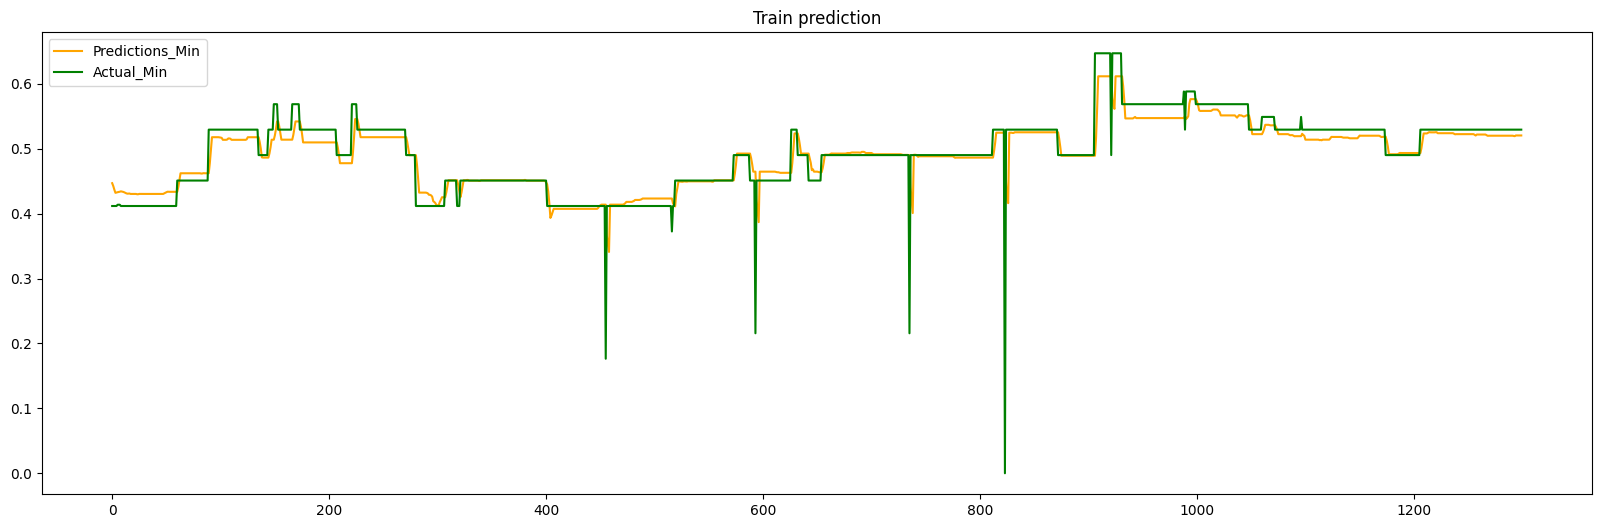

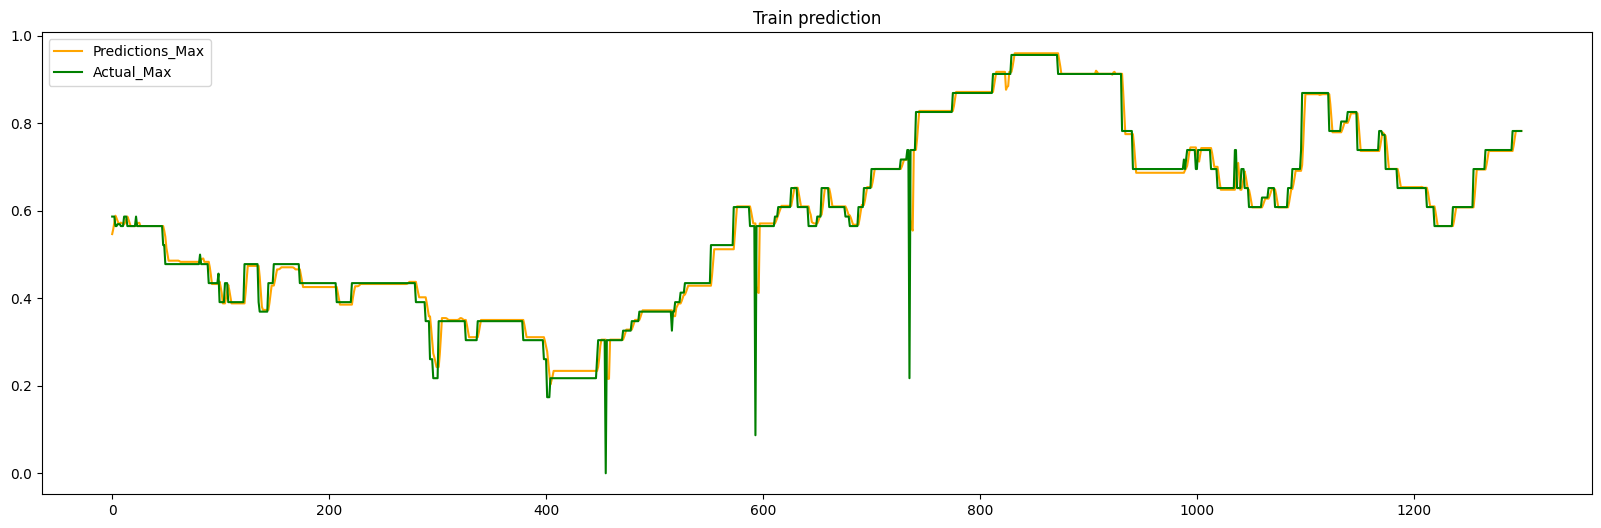

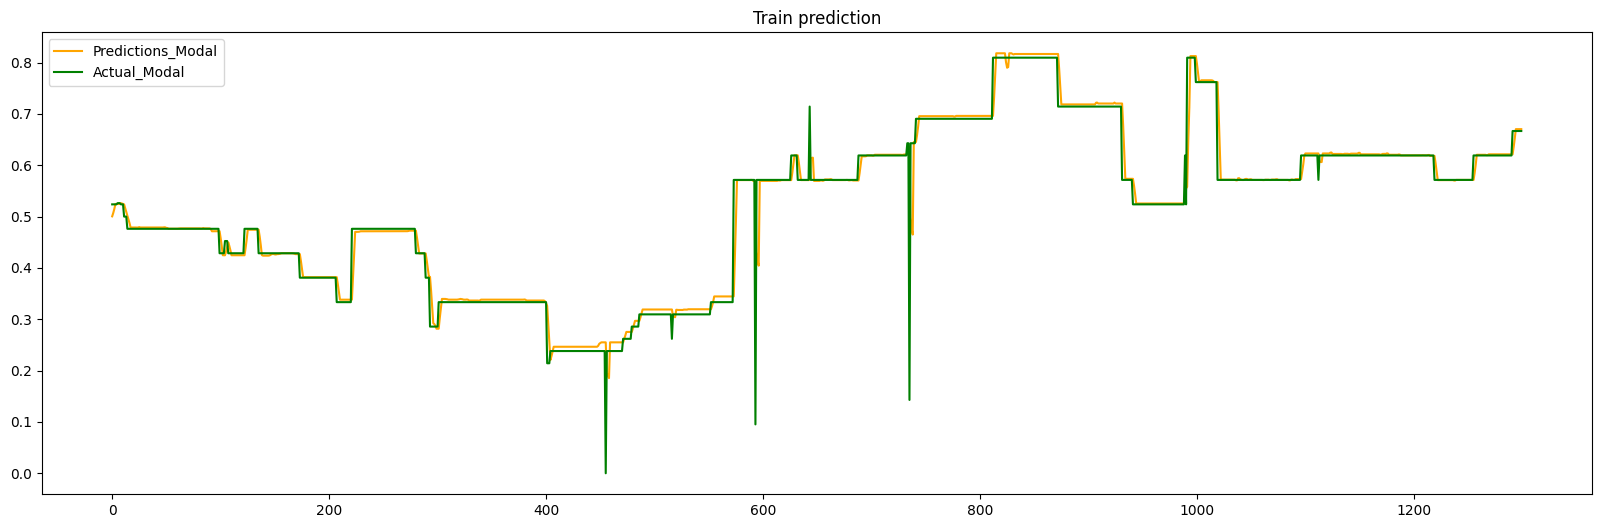

In [31]:
plot_predictions(model_gradeI, X_train_gradeI, y_train_gradeI, start=0, end=len(X_train_gradeI), tag='Train prediction')

Mean absolute error for Val prediction is 0.018471896876851517
-------------------------------------------------------------------------------------
r2 for Val prediction is 42.25448254854105
-------------------------------------------------------------------------------------
   prediction_Min  Actual_Min  prediction_Max  Actual_Max  prediction_Modal  \
0         0.52045    0.529412         0.78266    0.782609          0.670323   
1         0.52045    0.529412         0.78266    0.782609          0.670323   
2         0.52045    0.529412         0.78266    0.782609          0.670323   
3         0.52045    0.529412         0.78266    0.782609          0.670323   
4         0.52045    0.529412         0.78266    0.782609          0.670323   
5         0.52045    0.529412         0.78266    0.782609          0.670323   
6         0.52045    0.529412         0.78266    0.782609          0.670323   
7         0.52045    0.529412         0.78266    0.782609          0.670323   
8         0

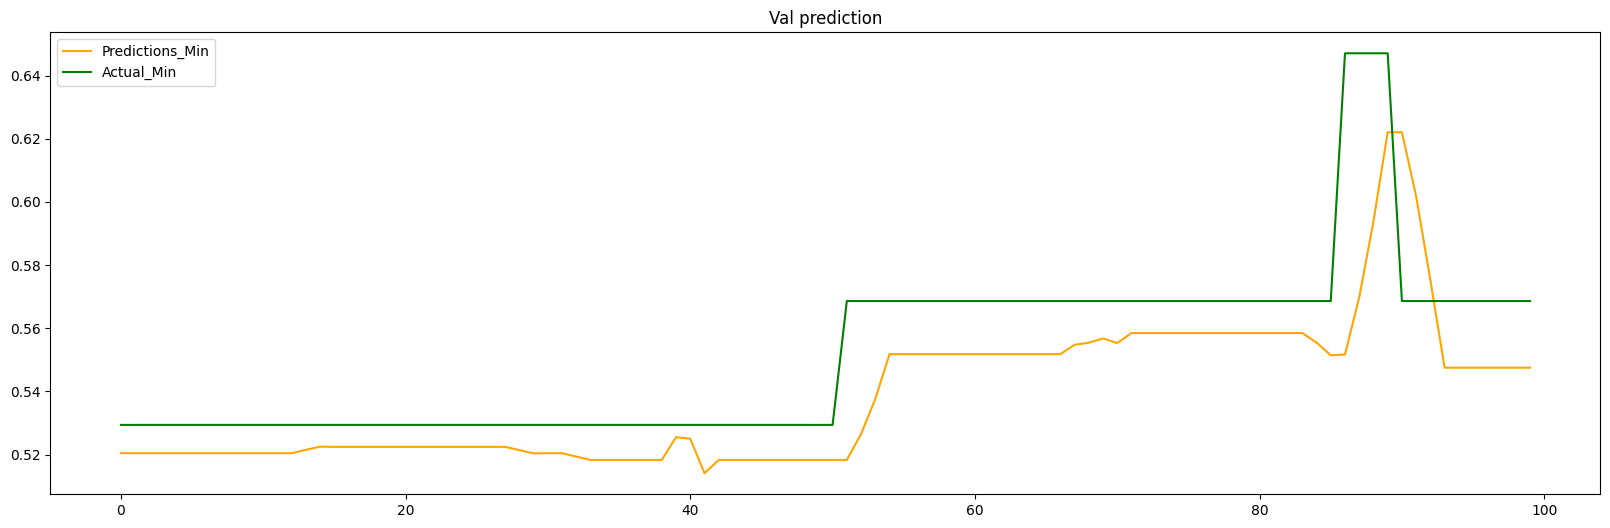

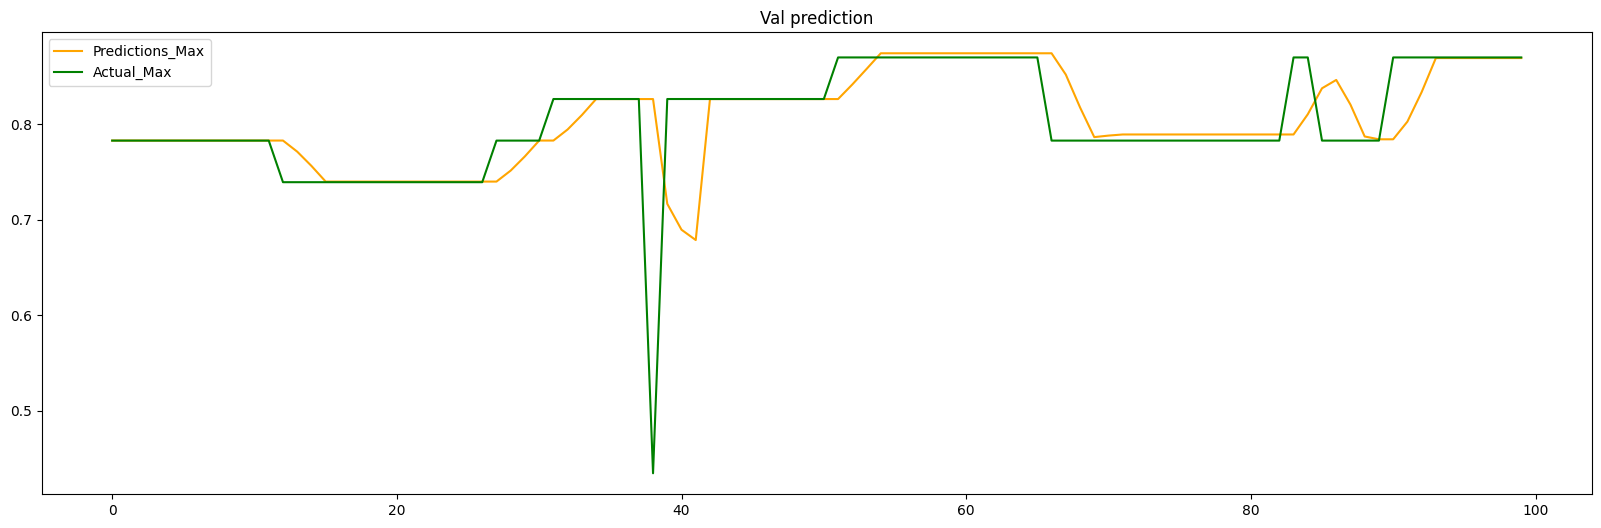

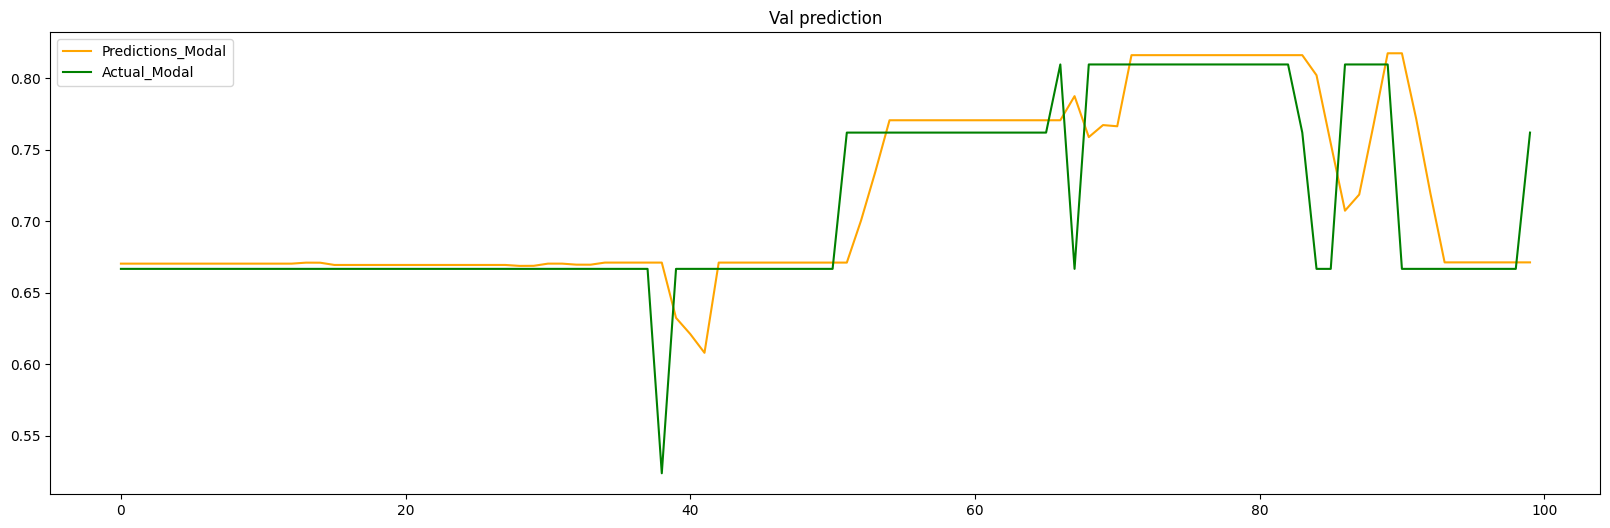

In [32]:
plot_predictions(model_gradeI, X_val_gradeI, y_val_gradeI, start=0, end=len(X_val_gradeI), tag='Val prediction')

Mean absolute error for Test prediction is 0.09345970093674766
-------------------------------------------------------------------------------------
r2 for Test prediction is 17.69314921808318
-------------------------------------------------------------------------------------
   prediction_Min  Actual_Min  prediction_Max  Actual_Max  prediction_Modal  \
0        0.548884    0.568627        0.871825    0.782609          0.701502   
1        0.552829    0.568627        0.851195    0.869565          0.752412   
2        0.553211    0.490196        0.840967    0.347826          0.757251   
3        0.542547    0.882353        0.684744    0.956522          0.637784   
4        0.598064    0.568627        0.718961    0.782609          0.660279   
5        0.606974    0.568627        0.673968    0.782609          0.656341   
6        0.659715    0.568627        0.837296    0.782609          0.778869   
7        0.551562    0.568627        0.781331    0.782609          0.670184   
8        0

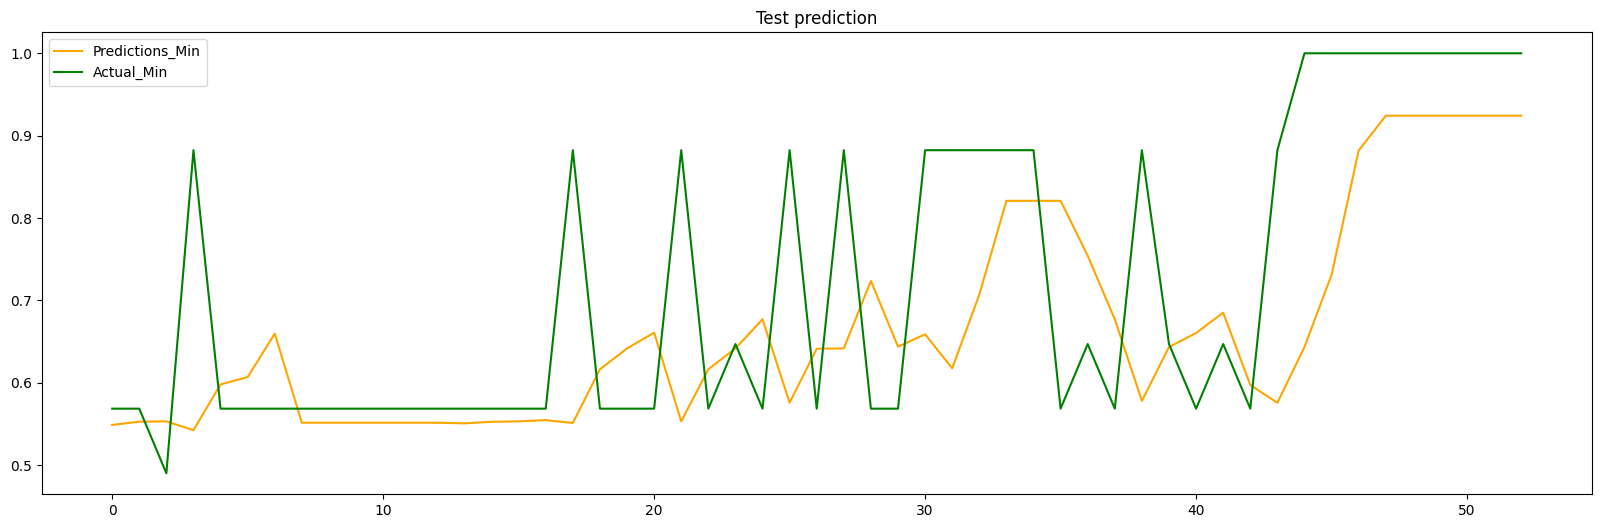

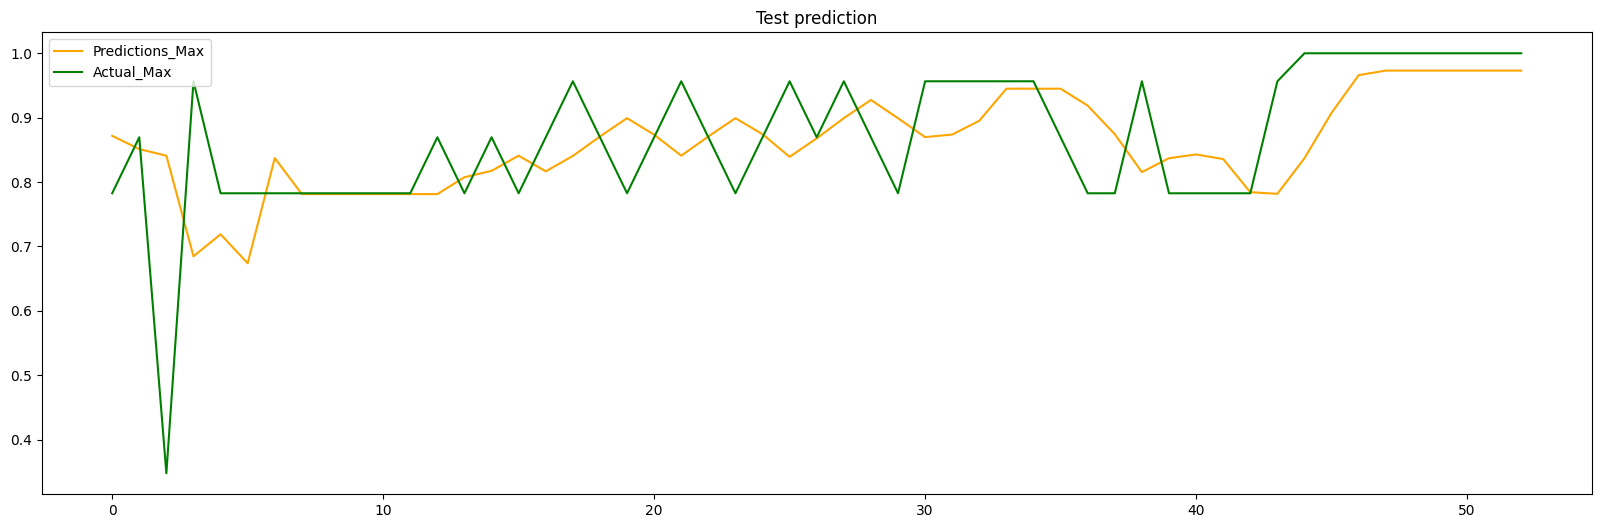

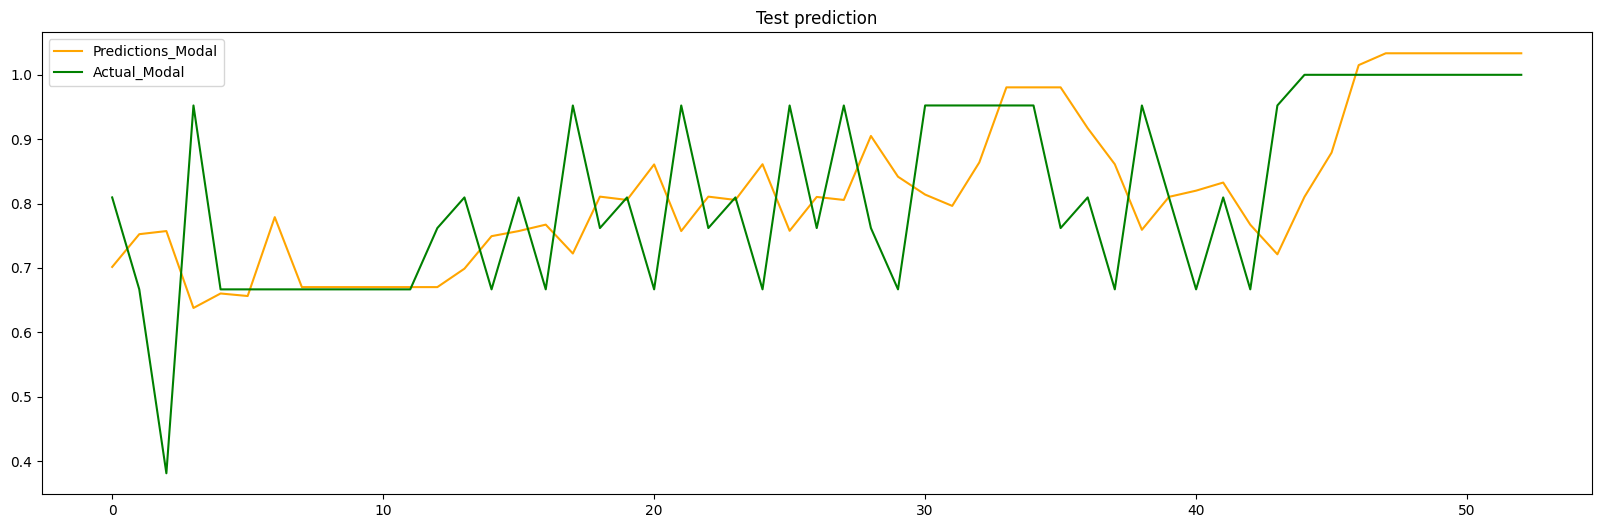

In [33]:
plot_predictions(model_gradeI, X_test_gradeI, y_test_gradeI, start=0, end=len(X_test_gradeI), tag='Test prediction')

In [34]:
# model_gradeI.save('./models/GradeI/model_gradeI.h5')

In [35]:
from tensorflow.keras.models import save_model


model_gradeI.save('./models/GradeI/model_gradeI(3,3)91.3473.keras')

In [3]:
from tensorflow.keras.models import load_model

model_gradeI = load_model('./models/GradeI/model_gradeI(3,3)91.3473.keras')

In [4]:
import joblib

scaler_gradeI = joblib.load('./Scaler Objects/scaler_grade-I.pkl')

In [30]:
recursive_prediction = []

last_batch = X_test_gradeI[-3,:,:].copy()

for i in range(31):
    reshaped_data = last_batch.reshape(1,last_batch.shape[0],last_batch.shape[1]) 
    next_day_prediction = model_gradeI.predict(reshaped_data,verbose=0)
    recursive_prediction.append(next_day_prediction)
    last_batch[-1] = next_day_prediction

In [31]:
for j in recursive_prediction:
    print(j)

[[0.92425036 0.9731217  1.0334541 ]]
[[0.9100936  0.96879345 1.0453457 ]]
[[0.90750617 0.96831656 1.0493859 ]]
[[0.90701324 0.96831626 1.0506719 ]]
[[0.9069229  0.96835375 1.0510819 ]]
[[0.9069074 0.9683752 1.0512125]]
[[0.9069048 0.9683847 1.051254 ]]
[[0.9069044  0.96838826 1.0512673 ]]
[[0.90690434 0.96838963 1.0512717 ]]
[[0.9069042 0.9683901 1.0512729]]
[[0.90690446 0.96839035 1.0512735 ]]
[[0.90690446 0.96839035 1.0512736 ]]
[[0.9069045  0.96839046 1.0512736 ]]
[[0.90690446 0.9683905  1.0512736 ]]
[[0.9069046  0.96839064 1.0512737 ]]
[[0.9069044 0.9683905 1.0512736]]
[[0.90690446 0.9683905  1.0512736 ]]
[[0.9069046  0.96839064 1.0512737 ]]
[[0.9069044 0.9683905 1.0512736]]
[[0.90690446 0.9683905  1.0512736 ]]
[[0.9069046  0.96839064 1.0512737 ]]
[[0.9069044 0.9683905 1.0512736]]
[[0.90690446 0.9683905  1.0512736 ]]
[[0.9069046  0.96839064 1.0512737 ]]
[[0.9069044 0.9683905 1.0512736]]
[[0.90690446 0.9683905  1.0512736 ]]
[[0.9069046  0.96839064 1.0512737 ]]
[[0.9069044 0.9683905 

In [32]:
for k in recursive_prediction:
    k = scaler_gradeI.inverse_transform(k) 
    print(k)

[[25068.385 32381.799 29702.535]]
[[24707.387 32282.248 29952.258]]
[[24641.406 32271.281 30037.104]]
[[24628.838 32271.273 30064.11 ]]
[[24626.533 32272.137 30072.719]]
[[24626.139 32272.63  30075.463]]
[[24626.072 32272.848 30076.334]]
[[24626.062 32272.93  30076.611]]
[[24626.06  32272.96  30076.705]]
[[24626.057 32272.973 30076.73 ]]
[[24626.064 32272.979 30076.742]]
[[24626.064 32272.979 30076.744]]
[[24626.064 32272.98  30076.744]]
[[24626.064 32272.98  30076.744]]
[[24626.066 32272.984 30076.748]]
[[24626.062 32272.98  30076.744]]
[[24626.064 32272.98  30076.744]]
[[24626.066 32272.984 30076.748]]
[[24626.062 32272.98  30076.744]]
[[24626.064 32272.98  30076.744]]
[[24626.066 32272.984 30076.748]]
[[24626.062 32272.98  30076.744]]
[[24626.064 32272.98  30076.744]]
[[24626.066 32272.984 30076.748]]
[[24626.062 32272.98  30076.744]]
[[24626.064 32272.98  30076.744]]
[[24626.066 32272.984 30076.748]]
[[24626.062 32272.98  30076.744]]
[[24626.064 32272.98  30076.744]]
[[24626.066 32